## Задание 1

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [178]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

In [105]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
def movie_class(rating):
    if rating <= 2:
        return 'low'
    elif rating > 4:
        return 'high'
    return 'middle'

In [6]:
ratings['class'] = ratings['rating'].apply(movie_class)
ratings.head()

,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,middle
1,1,1029,3.0,1260759179,middle
2,1,1061,3.0,1260759182,middle
3,1,1129,2.0,1260759185,low
4,1,1172,4.0,1260759205,middle


## Задание 2

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [7]:
keywords = pd.read_csv('keywords.csv')
keywords.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [91]:
def region(query):
    geo_patterns = {
        'Центр': r'\bтул[уаеыой]*\b|\bтульск|\bмоскв[уыаеой]|\bмосковск\bярославл[ьяеюм]|\bярославск',
        'Северо-Запад': r'\bпетербург|\bпите[раеом]|\bпско[веаом]|псковск|\мурманск',
        'Дальний Восток': r'\bвладивосток|\bсахалин|\bхабаровск'
    }
    for name, pattern in geo_patterns.items():
        if re.findall(pattern, query):
            return name
    return 'undefined'


In [103]:
keywords['region'] = keywords['keyword'].apply(region)

## Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.
2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
    1. для каждой строки пройдите по всем годам списка years
    2. если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
    3. если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’
4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга



In [162]:
movies = pd.read_csv('movies.csv')
joined = ratings.merge(movies, on='movieId', how='left')
joined.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [123]:
years = np.arange(1950, 2011)

In [124]:
def production_year(row, years=years):
    for i in years:
        if str(i) in row:
            return str(i)
    return '1900'    

In [185]:
joined['year'] = joined['title'].apply(production_year)
joined.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,1995
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical,1900
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller,1996
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,1981
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,1989


In [188]:
new_old = joined.groupby('year').mean().sort_values('rating', ascending=False)
new_old.head()

,userId,movieId,rating,timestamp
year,,,,
1957,360.933544,2750.965190,4.014241,1.083707e+09
1972,359.694878,3983.538976,4.011136,1.122759e+09
1952,346.394737,4107.796053,4.000000,1.090512e+09
1954,358.228324,2867.661850,3.994220,1.070591e+09
1951,347.106996,2605.588477,3.983539,1.052714e+09


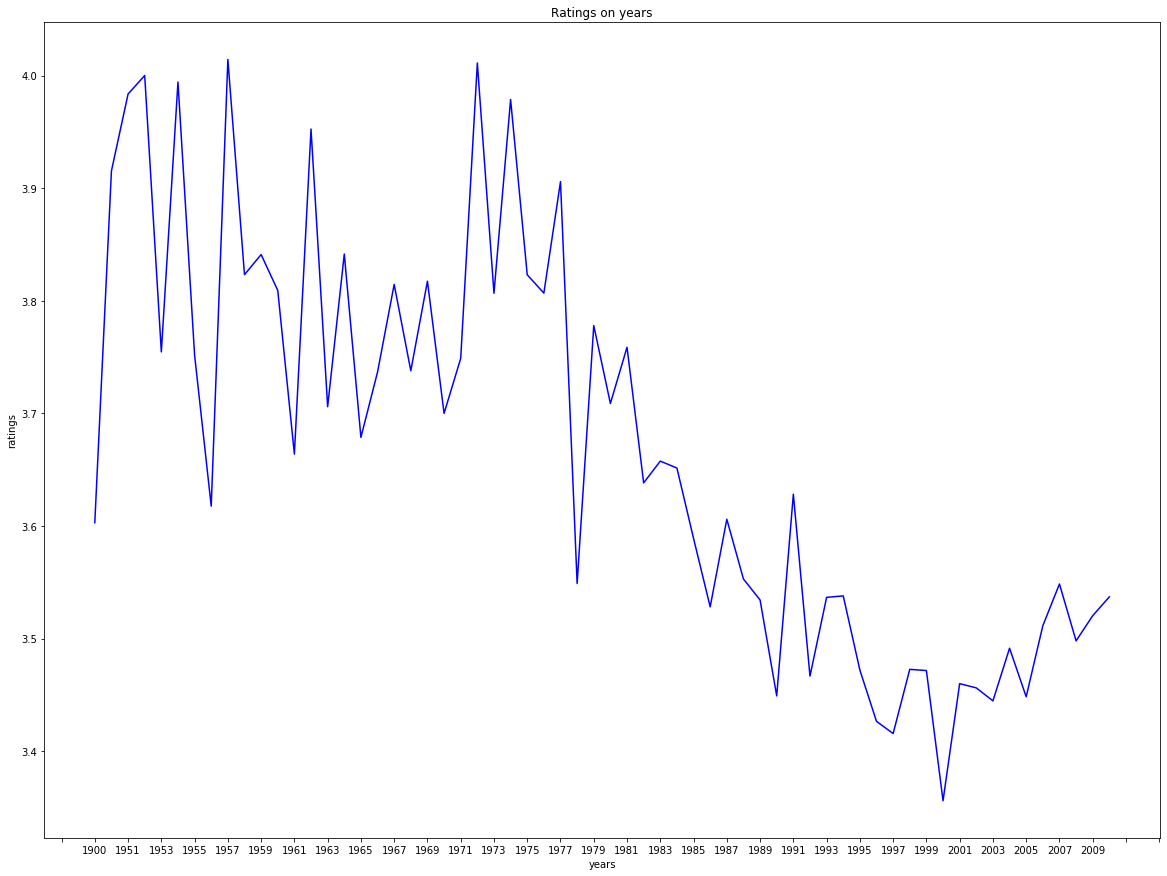

In [201]:
data = new_old.reset_index().sort_values('year').loc[:, ['year', 'rating']]
fig, ax = plt.subplots(figsize=(20, 15))
plt.plot(data['year'], data['rating'], c='b')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.xlabel('years')
plt.ylabel('ratings')
plt.title('Ratings on years')
plt.show()

Вывод: общая тенденция угадывается: с течением лет средний рейтинг фильмов действительно уменшается. Но не стоит заблаговременно делать вывод, что фильмы становятся хуже, чем были раньше, ведь одного исслдеования среднего рейтинга недостаточно, чтобы ответить на такой вопрос.